In [191]:
import subprocess
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [192]:
def initialize_experiment() -> None:
    subprocess.run(["make"])

def run_experiment(strategy: str, distribution: str, elements_number: int, repetitions: int) -> float:
    result = subprocess.run(f"./experiment {strategy} {distribution} {elements_number} {repetitions}",
                            shell=True, capture_output=True, text=True)
    return float(result.stdout)

def clean_experiment() -> None:
    subprocess.run(["make", "clean"])

In [193]:
STRATEGIES = ["next-fit", "random-fit", "first-fit", "best-fit", "worst-fit"]
DISTRIBUTIONS = ["uniform", "geometric", "harmonic", "biharmonic"]
ELEMENTS_NUMBERS = 100
REPS = 10000

initialize_experiment()

results = {}
for strategy in STRATEGIES:
    results[strategy] = {}
    for distribution in DISTRIBUTIONS:
        results[strategy][distribution] = run_experiment(strategy, distribution, ELEMENTS_NUMBERS, REPS)

with open("results.pkl", "wb") as f:
    pickle.dump(results, f)
        
clean_experiment()

g++ -std=c++17 -Wall -Wextra -Werror -pedantic -O3 main.cpp -o experiment
rm -f experiment


{'uniform': [1.286, 1.17214, 1.16818, 1.16533, 1.18439], 'geometric': [1.29673, 1.14077, 1.1345, 1.12562, 1.17307], 'harmonic': [1.28882, 1.16133, 1.1577, 1.1521, 1.1809], 'biharmonic': [1.299, 1.14406, 1.13744, 1.12901, 1.175]}


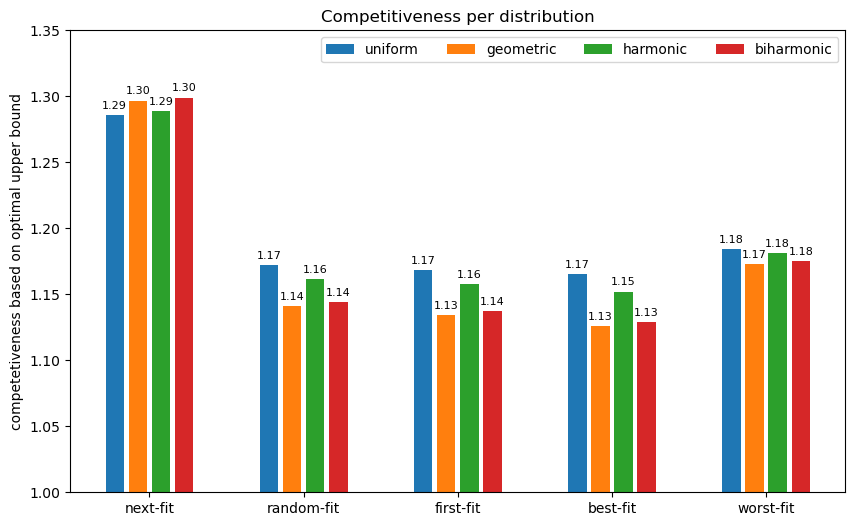

In [213]:
BAR_WIDTH = 0.12
BARS_SPACING = 0.03

with open("results.pkl", "rb") as f:
    results = pickle.load(f)

grouped_by_distribution = {}
for distribution in DISTRIBUTIONS:
    grouped_by_distribution[distribution] = {}
    for strategy in STRATEGIES:
        grouped_by_distribution[distribution][strategy] = results[strategy][distribution]

for distribution in DISTRIBUTIONS:
    array = []
    for strategy in STRATEGIES:
        array.append(results[strategy][distribution])
    grouped_by_distribution[distribution] = array

print(grouped_by_distribution)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(STRATEGIES))

multiplier = 0
for distribution, measurement in grouped_by_distribution.items():
    offset = (BAR_WIDTH + BARS_SPACING) * multiplier
    bars = ax.bar(x + offset, measurement, BAR_WIDTH, label=distribution)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    multiplier += 1

ax.set_ylabel("competetiveness based on optimal upper bound")
ax.set_title("Competitiveness per distribution")
ax.set_xticks(x + 3/2 * BAR_WIDTH + 3/2 * BARS_SPACING, STRATEGIES)
ax.legend(loc="best", ncols=4)
ax.set_ylim(1, 1.35)

# plt.savefig("plots/competitiveness_per_distribution.png")
plt.show()

{'next-fit': [1.286, 1.29673, 1.28882, 1.299], 'random-fit': [1.17214, 1.14077, 1.16133, 1.14406], 'first-fit': [1.16818, 1.1345, 1.1577, 1.13744], 'best-fit': [1.16533, 1.12562, 1.1521, 1.12901], 'worst-fit': [1.18439, 1.17307, 1.1809, 1.175]}


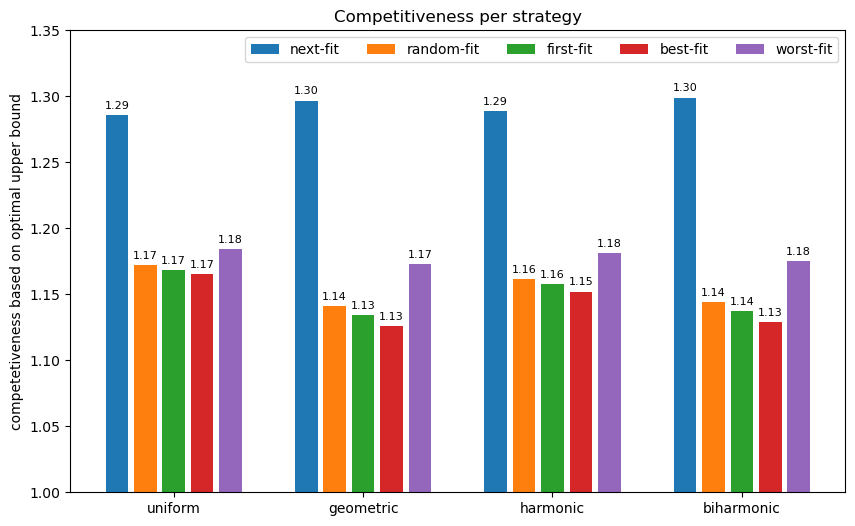

In [214]:
BAR_WIDTH = 0.12
BARS_SPACING = 0.03

with open("results.pkl", "rb") as f:
    results = pickle.load(f)

grouped_by_strategy = {}
for strategy in STRATEGIES:
    grouped_by_strategy[strategy] = {}
    for distribution in DISTRIBUTIONS:
        grouped_by_strategy[strategy][distribution] = results[strategy][distribution]

for strategy in STRATEGIES:
    array = []
    for distribution in DISTRIBUTIONS:
        array.append(results[strategy][distribution])
    grouped_by_strategy[strategy] = array

print(grouped_by_strategy)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(DISTRIBUTIONS))

multiplier = 0
for strategy, measurement in grouped_by_strategy.items():
    offset = (BAR_WIDTH + BARS_SPACING) * multiplier
    bars = ax.bar(x + offset, measurement, BAR_WIDTH, label=strategy)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    multiplier += 1

ax.set_ylabel("competetiveness based on optimal upper bound")
ax.set_title("Competitiveness per strategy")
ax.set_xticks(x + 2 * BAR_WIDTH + 2 * BARS_SPACING, DISTRIBUTIONS)
ax.legend(loc="best", ncols=5)
ax.set_ylim(1, 1.35)

# plt.savefig("plots/competitiveness_per_strategy.png")
plt.show()


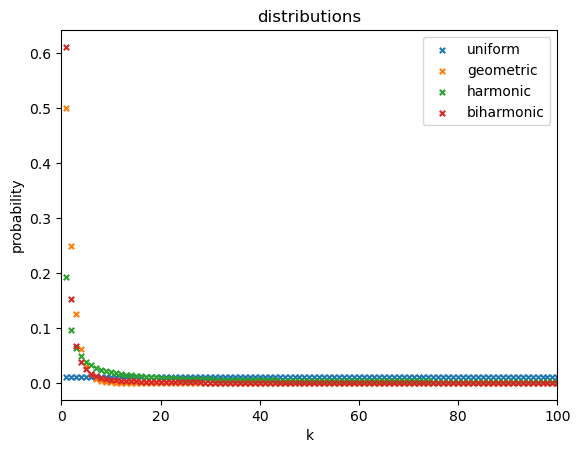

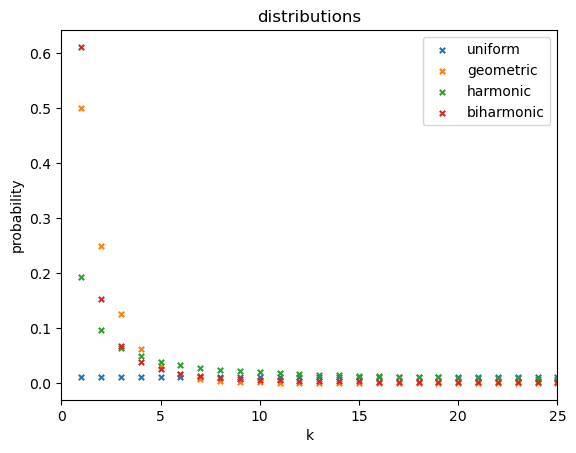

In [196]:
def harmonic_num(n ,k) -> float:
    return sum([1 / i**k for i in range(1, n + 1)])

def uniform(k: int) -> float:
    return 1 / 100

def geometrc(k: int) -> float:
    return 1 / (2 ** min(k, 99))

def harmonic(k: int) -> float:
    return 1 / k / harmonic_num(100, 1)

def biharmonic(k: int) -> float:
    return 1 / k**2 / harmonic_num(100, 2)

ks = []
us = []
gs = []
hs = []
bs = []
for k in range(1, 101):
    ks.append(k)
    us.append(uniform(k))
    gs.append(geometrc(k))
    hs.append(harmonic(k))
    bs.append(biharmonic(k))

for x_lims in [(0, 100), (0, 25)]:
    plt.scatter(ks, us, label="uniform", marker="x", s=15)
    plt.scatter(ks, gs, label="geometric", marker="x", s=15)
    plt.scatter(ks, hs, label="harmonic", marker="x", s=15)
    plt.scatter(ks, bs, label="biharmonic", marker="x", s=15)
    plt.title("distributions")
    plt.xlabel("k")
    plt.ylabel("probability")
    plt.legend()
    plt.xlim(x_lims)
    plt.show()